In [25]:
from tensorflow.keras.models import load_model
import pickle

In [26]:
# Load the saved model
model = load_model('art_style_model.keras')

In [27]:
# Load the class indices
with open('class_indices.pkl', 'rb') as f:
    class_indices = pickle.load(f)

In [28]:
# Invert the class indices to get a mapping from indices to class labels
class_labels = {v: k for k, v in class_indices.items()}

In [29]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
def load_image_from_url(url, target_size=(128, 128)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image array
    return img_array, img

In [31]:
def predict_art_style(model, img_array, class_labels):
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

In [32]:
# Define the URL of the image you want to classify
image_url = 'https://storage.googleapis.com/pod_public/1300/237349.jpg'

In [33]:
# Load and preprocess the image
img_array, img = load_image_from_url(image_url)

In [34]:
# Predict the art style
predicted_art_style = predict_art_style(model, img_array, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


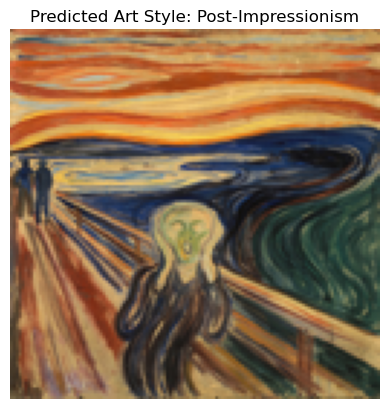

In [35]:
# Display the image and the prediction
plt.imshow(img)
plt.title(f"Predicted Art Style: {predicted_art_style}")
plt.axis('off')
plt.show()

In [36]:
# Print the result
print(f"The predicted art style is: {predicted_art_style}")

The predicted art style is: Post-Impressionism


In [ ]:
## test subjects(links)
#https://storage.googleapis.com/pod_public/1300/237349.jpg
#https://i.pinimg.com/564x/cc/d7/e0/ccd7e0e55c78d81e6e177c906231f734.jpg # this is the fun one

#https://img.fruugo.com/product/0/12/70967120_max.jpg